# Title :  1985 automobile 

### mini project for 2nd interview (9/1)

In [1]:
%cd automobile

/Users/sinsanghun/automobile


In [2]:
%ls

Index.txt         imports-85.names  misc.txt
imports-85.data   mini2.csv


In [3]:
import sys 
sys.path.append("/Users/sinsanghun/anaconda/lib/python2.7/site-packages")

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms
import sklearn as sk

pd.options.display.max_columns = 70
%matplotlib inline

/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 0. Loading data

In [5]:
feature_col = ["symboling",
              "normalized_losses",
              "make",
              "fuel_type",
              "aspiration",
              "num_of_doors",
              "body_style",
              "drive_wheels",
              "engine_location",
              "wheel_base",
              "length",
              "width",
              "height",
              "curb_weight",
              "engine_type",
               "num_of_cylinders",
               "engine_size",
              "fuel_system",
              "bore",
              "stroke",
              "compression_ratio",
              "horsepower",
              "peak_rpm",
              "city_mpg",
              "highway_mpg",
              "price"]

In [6]:
def load_data():
    
    df = pd.read_csv("imports-85.data", names=feature_col)
    
    # print how many datas in files 
    print("Dimension :", df.shape[0], "x", df.shape[1])

    # replace "?" to NaN
    df = df.replace("?", np.NaN)

    # check the number of missing values in each columns
    print("---------------------------------------------")
    print("the number of missing values in each columns")
    print(df.isnull().sum())
    print("---------------------------------------------")

    #Missing values: denoted by quotation marks (‘?’). Skip data samples with
    #missing values in the target.
    df = df[df["normalized_losses"].notnull()]
    df.shape

    # target values
    dfy = df["normalized_losses"]

    # Because of instruction to ingnore the 'symboling' feature
    dfX = df.iloc[:, 2:] 
    
    return dfX, dfy

In [7]:
dfX, dfy = load_data();

Dimension : 205 x 26
---------------------------------------------
the number of missing values in each columns
symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
---------------------------------------------


In [8]:
dfX.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


# 1. Data preprocessing

## Convert num-of-doors, num-of-cylinders to numerical feature

In [9]:
dfX["num_of_doors"].value_counts()

four    95
two     68
Name: num_of_doors, dtype: int64

In [10]:
dfX["num_of_cylinders"].value_counts()

four     137
six       14
five       7
two        4
eight      1
three      1
Name: num_of_cylinders, dtype: int64

In [11]:
number_mapping = {"one" : 1, "two" : 2, "three" : 3, "four" : 4, 
                 "five" : 5, "six" : 6, "seven" : 7, "eight" : 8}

In [12]:
dfX["num_of_doors"] = dfX["num_of_doors"].map(number_mapping)

In [13]:
dfX["num_of_cylinders"] = dfX["num_of_cylinders"].map(number_mapping)

In [14]:
dfX["num_of_doors"].value_counts()

4.0    95
2.0    68
Name: num_of_doors, dtype: int64

In [15]:
dfX["num_of_cylinders"].value_counts()

4    137
6     14
5      7
2      4
8      1
3      1
Name: num_of_cylinders, dtype: int64

## Convert features to proper type 

In [16]:
numeric = ["num_of_doors", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders",
           "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
           "highway_mpg", "price"]

categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels",
               "engine_location", "engine_type","fuel_system"]

print("numeric features :", len(numeric))
print("categorical features :", len(categorical))

numeric features : 16
categorical features : 8


In [17]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df

,Feature,Column Type
0,make,object
1,fuel_type,object
2,aspiration,object
3,num_of_doors,float64
4,body_style,object
5,drive_wheels,object
6,engine_location,object
7,wheel_base,float64
8,length,float64
9,width,float64


In [18]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Feature
0,int64,5
1,float64,6
2,object,13


In [19]:
dfX[numeric] = dfX[numeric].astype(float)
dfX[categorical] = dfX[categorical].astype(str)

In [20]:
dfy = dfy.astype(float)

In [21]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df.groupby("Column Type").count()

,Feature
Column Type,
float64,16
object,8


## Imputation NaN values

In [22]:
def missing(df):
    missing_pct = df.isnull().sum()
    missing_pct = missing_pct.sort_values(ascending=False)
    plt.figure(figsize=(5,7), dpi=100)
    sns.barplot(y=missing_pct.index, x=missing_pct.values, alpha=0.9, color="r", orient="h")
    plt.xlabel("Missing_pct", fontsize=12)
    plt.title("Percent of missing values in each column", fontsize=15)

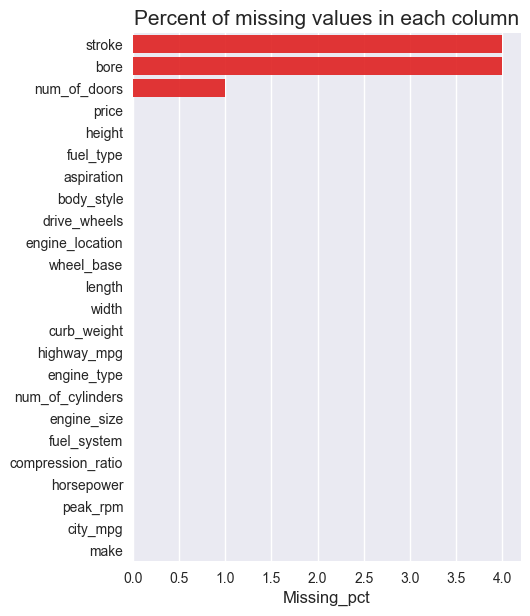

In [23]:
missing(dfX)

In [24]:
dfX[dfX["num_of_doors"].isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191.0,ohc,4.0,98.0,mpfi,3.03,3.39,7.6,102.0,5500.0,24.0,30.0,8558.0


In [25]:
dfX[dfX["bore"].isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500.0,rotor,2.0,80.0,mpfi,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


In [26]:
dfX[dfX["stroke"].isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385.0,rotor,2.0,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500.0,rotor,2.0,80.0,mpfi,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


In [27]:
from sklearn.preprocessing import Imputer
# handle missing values on stroke, bore, num-of-doors , to minimize outlier's effect, use median 
imr_median = Imputer(missing_values="NaN", strategy="median", axis=0)

In [28]:
imr = imr_median.fit(dfX[["num_of_doors", "bore", "stroke"]])

In [29]:
dfX[["num_of_doors", "bore", "stroke"]] = imr.transform(dfX[["num_of_doors", "bore", "stroke"]])

In [30]:
dfX.isnull().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [31]:
print("Dimension :", dfX.shape[0], "x", dfX.shape[1])

Dimension : 164 x 24


-------------

# 2. Distribution for each column

### target feature - normalized losses

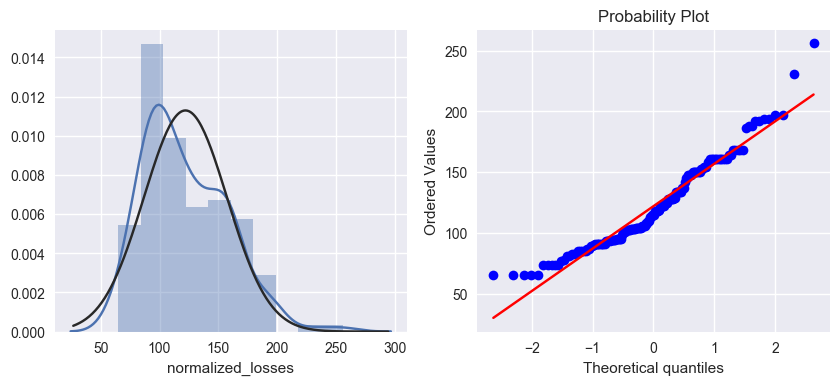

In [32]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(dfy, fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(dfy).reshape(164,), plot=plt)
plt.show()

### log transforamtion

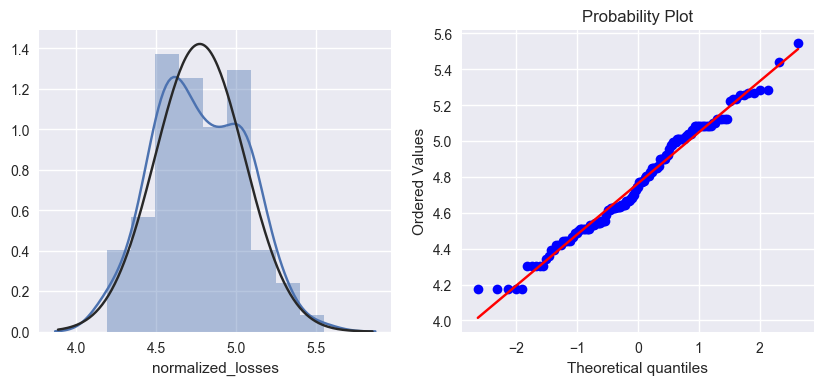

In [33]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(np.log(dfy+1), fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(np.log(dfy)).reshape(164,), plot=plt)
plt.show()

In [34]:
# log transformation
dfy = np.log1p(dfy)

### categorical features distribution

In [35]:
def count_plot(df, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a=sns.countplot(df[feature[i]])
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.tight_layout()

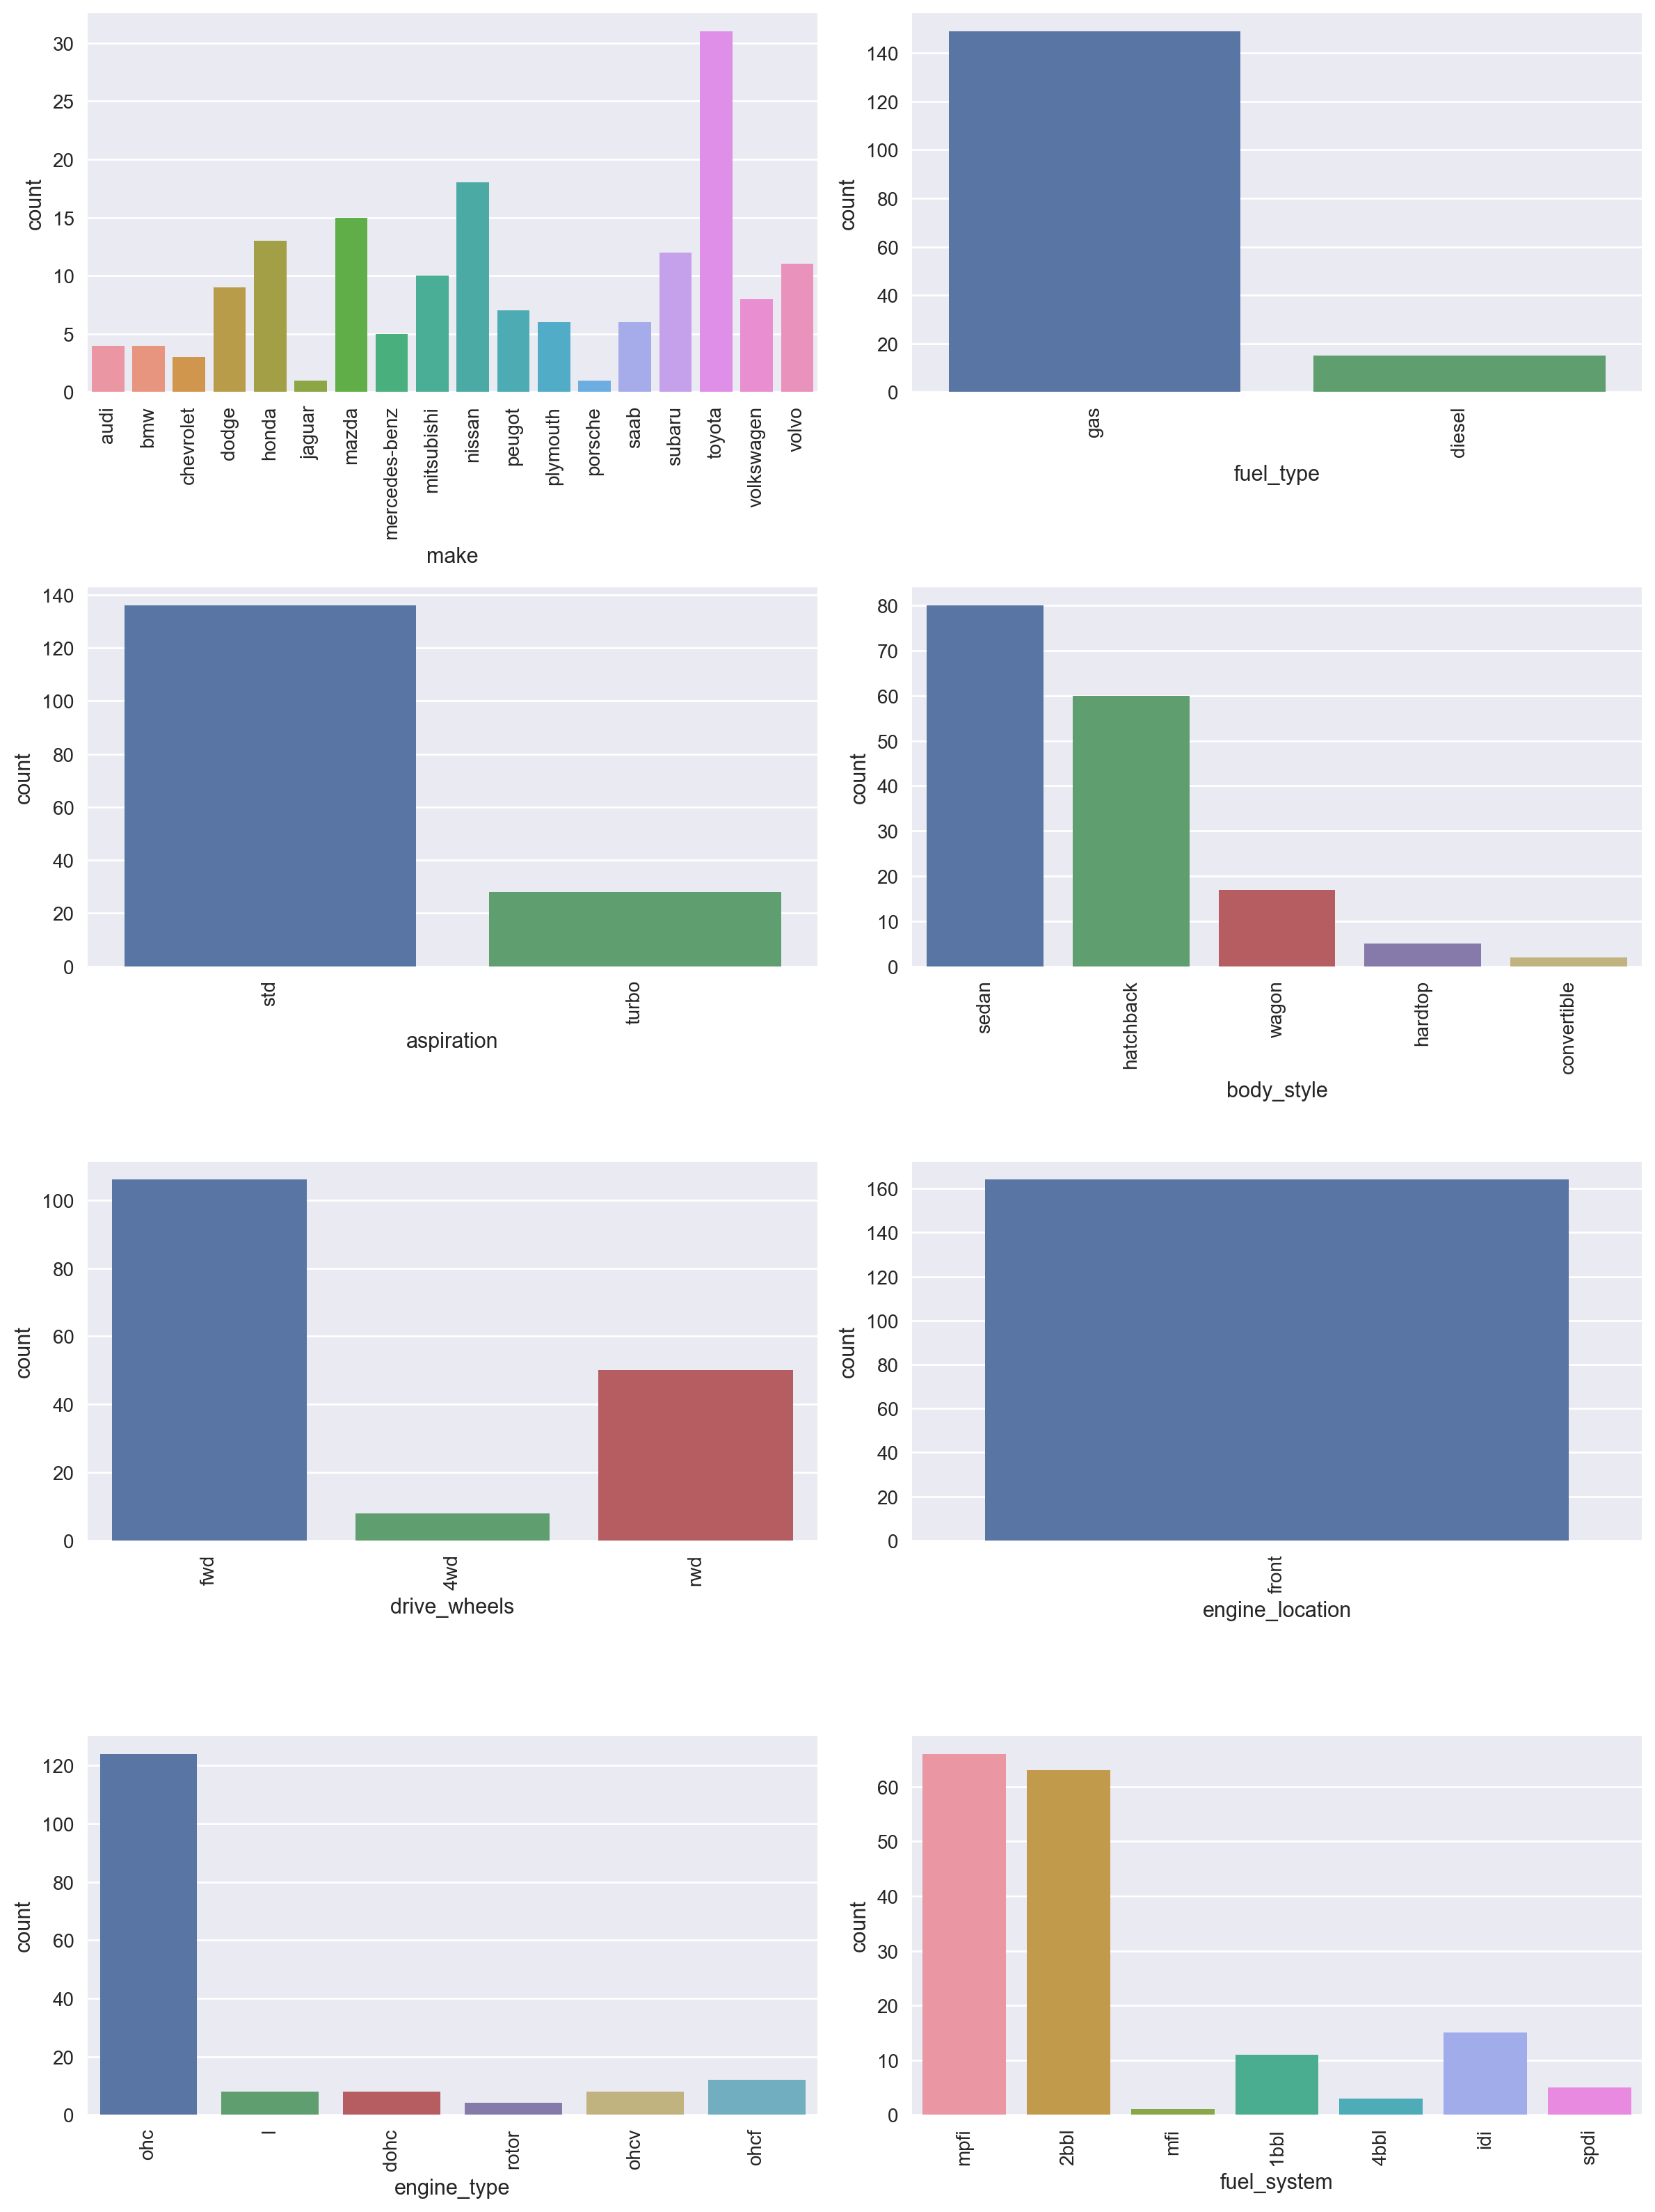

In [36]:
count_plot(dfX, categorical)

In [37]:
def box_plot(df, dfy, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a = sns.boxplot(x=df[feature[i]], y=dfy, data=df)
        plt.tight_layout()
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.title(feature[i])

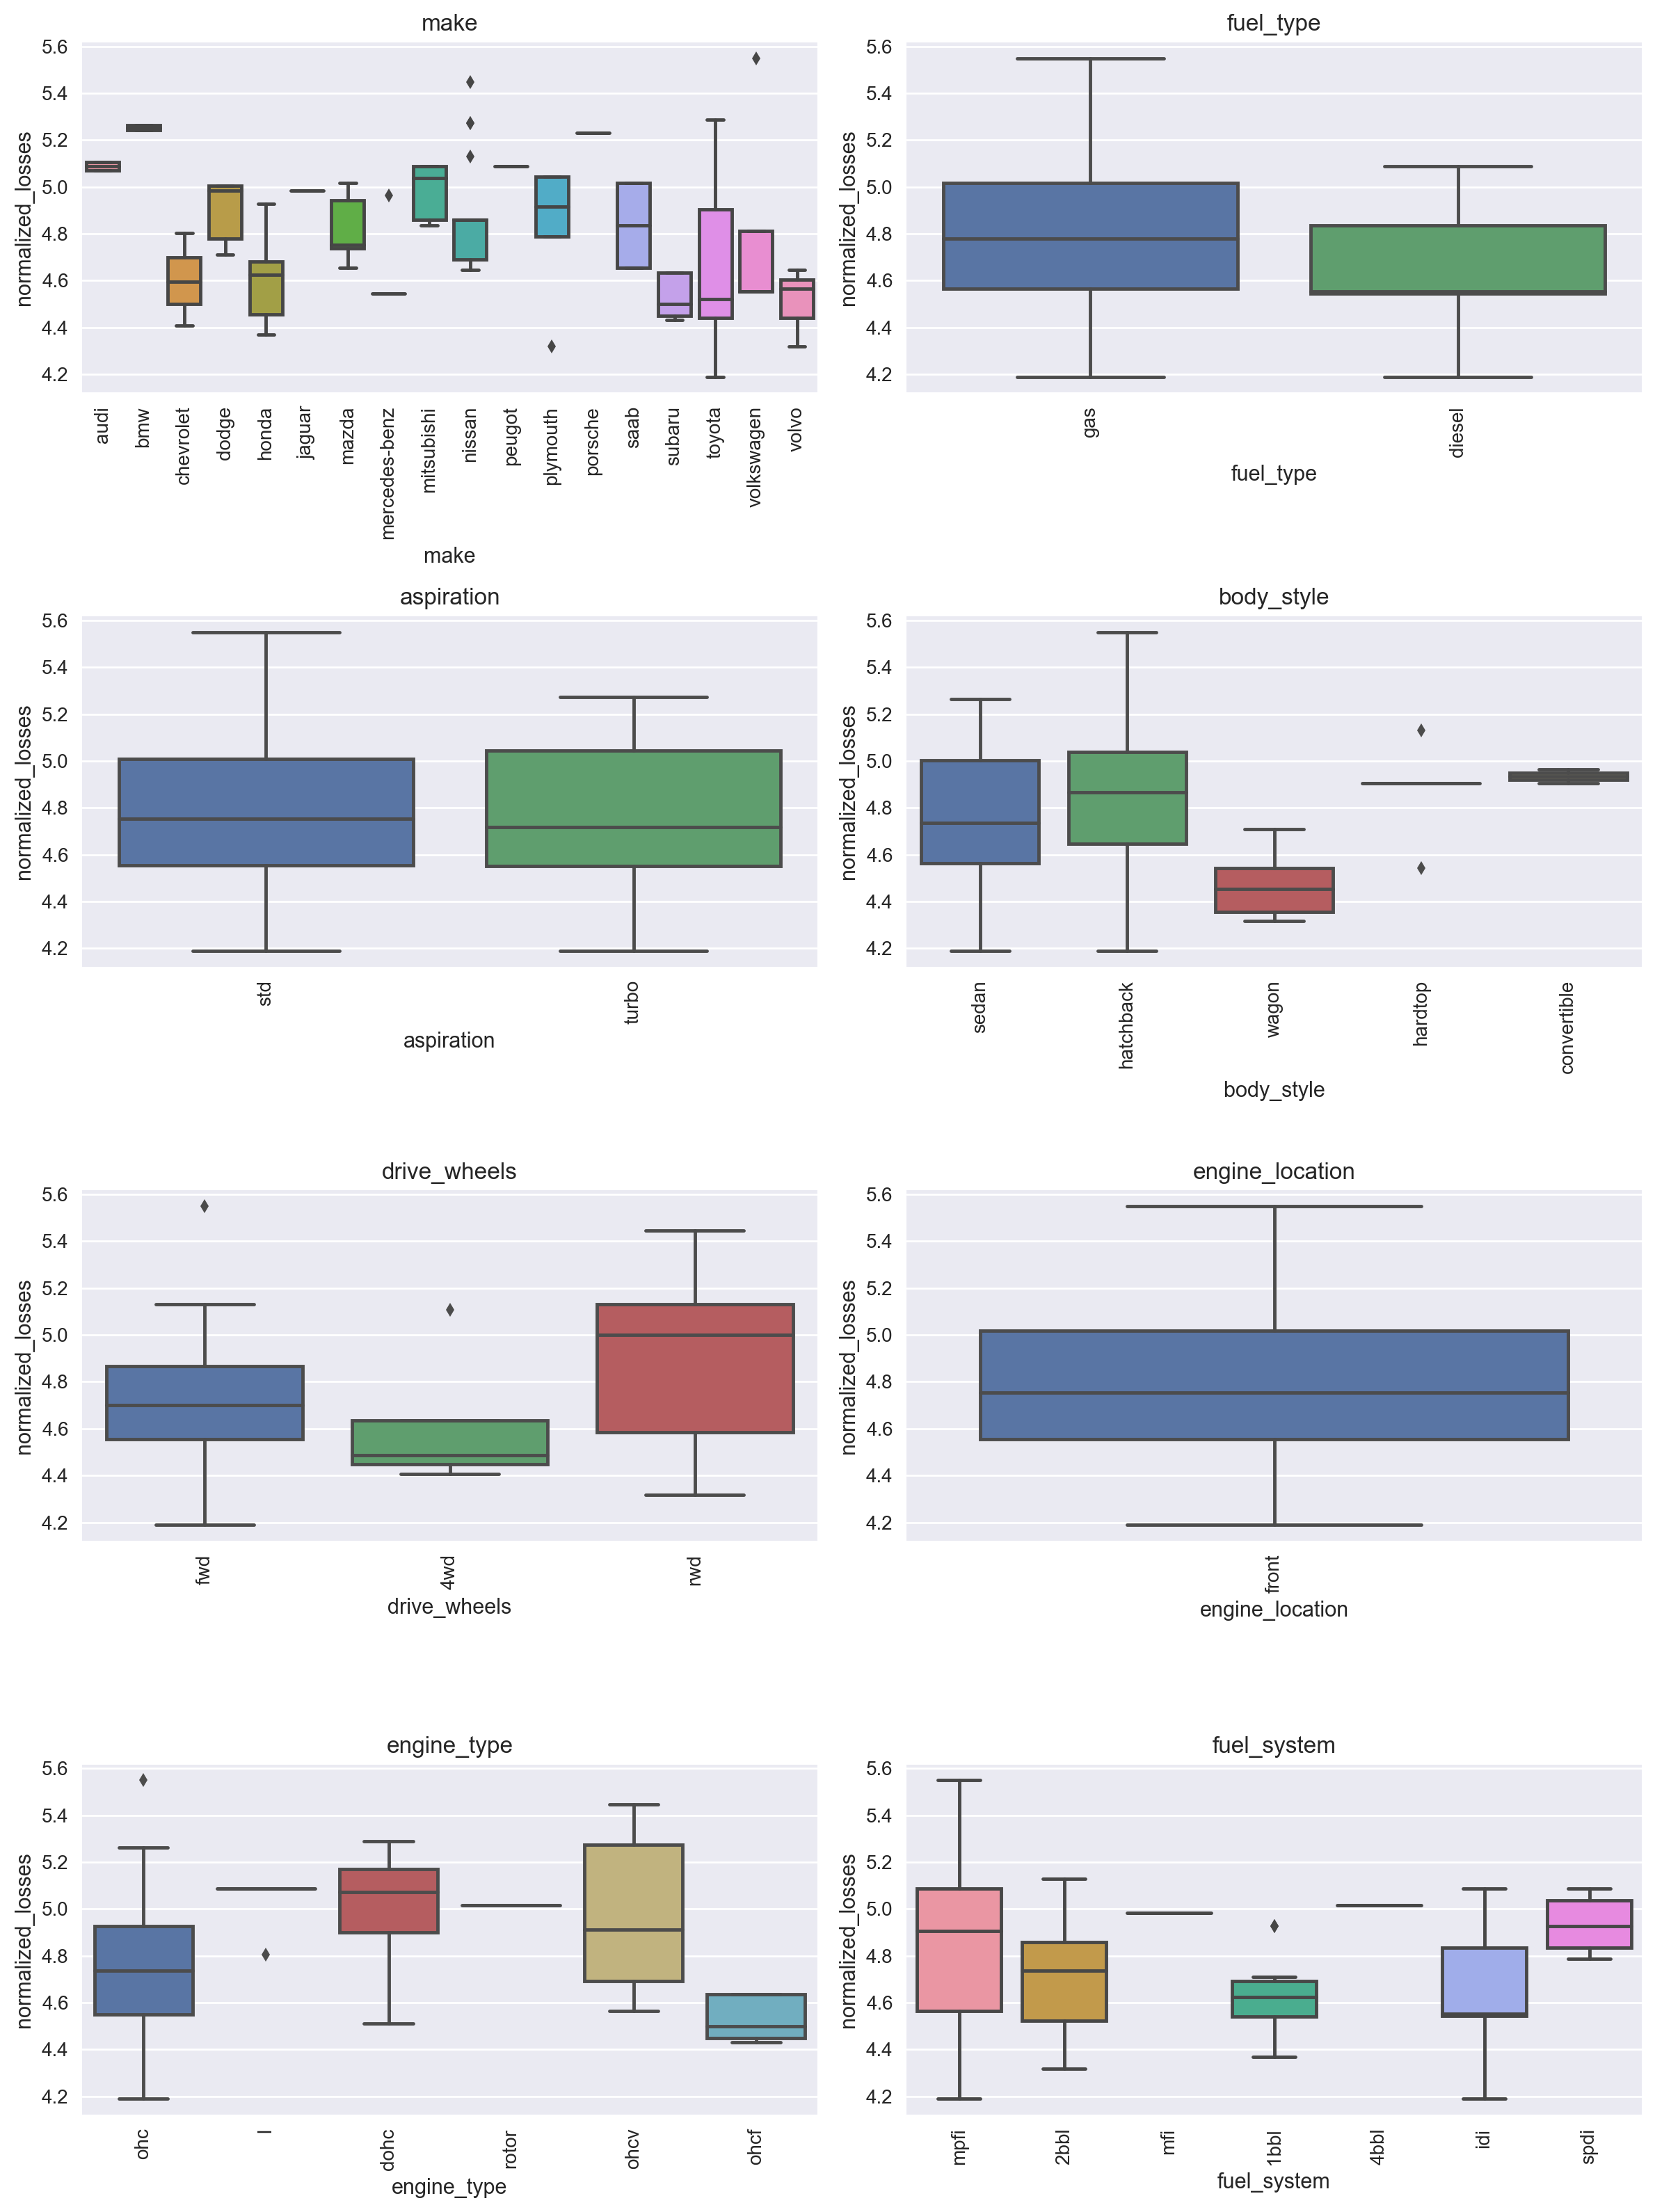

In [38]:
box_plot(dfX, dfy, categorical)

### numeric features distribution

In [39]:
def dist_plot(df, feature):
    plt.figure(figsize=(10,24), dpi=150)
    for i in range(len(feature)):
        plt.subplot(8, 2, i+1)
        sns.distplot(df[feature[i]], fit = sp.stats.norm, color="deepskyblue")
        plt.tight_layout()

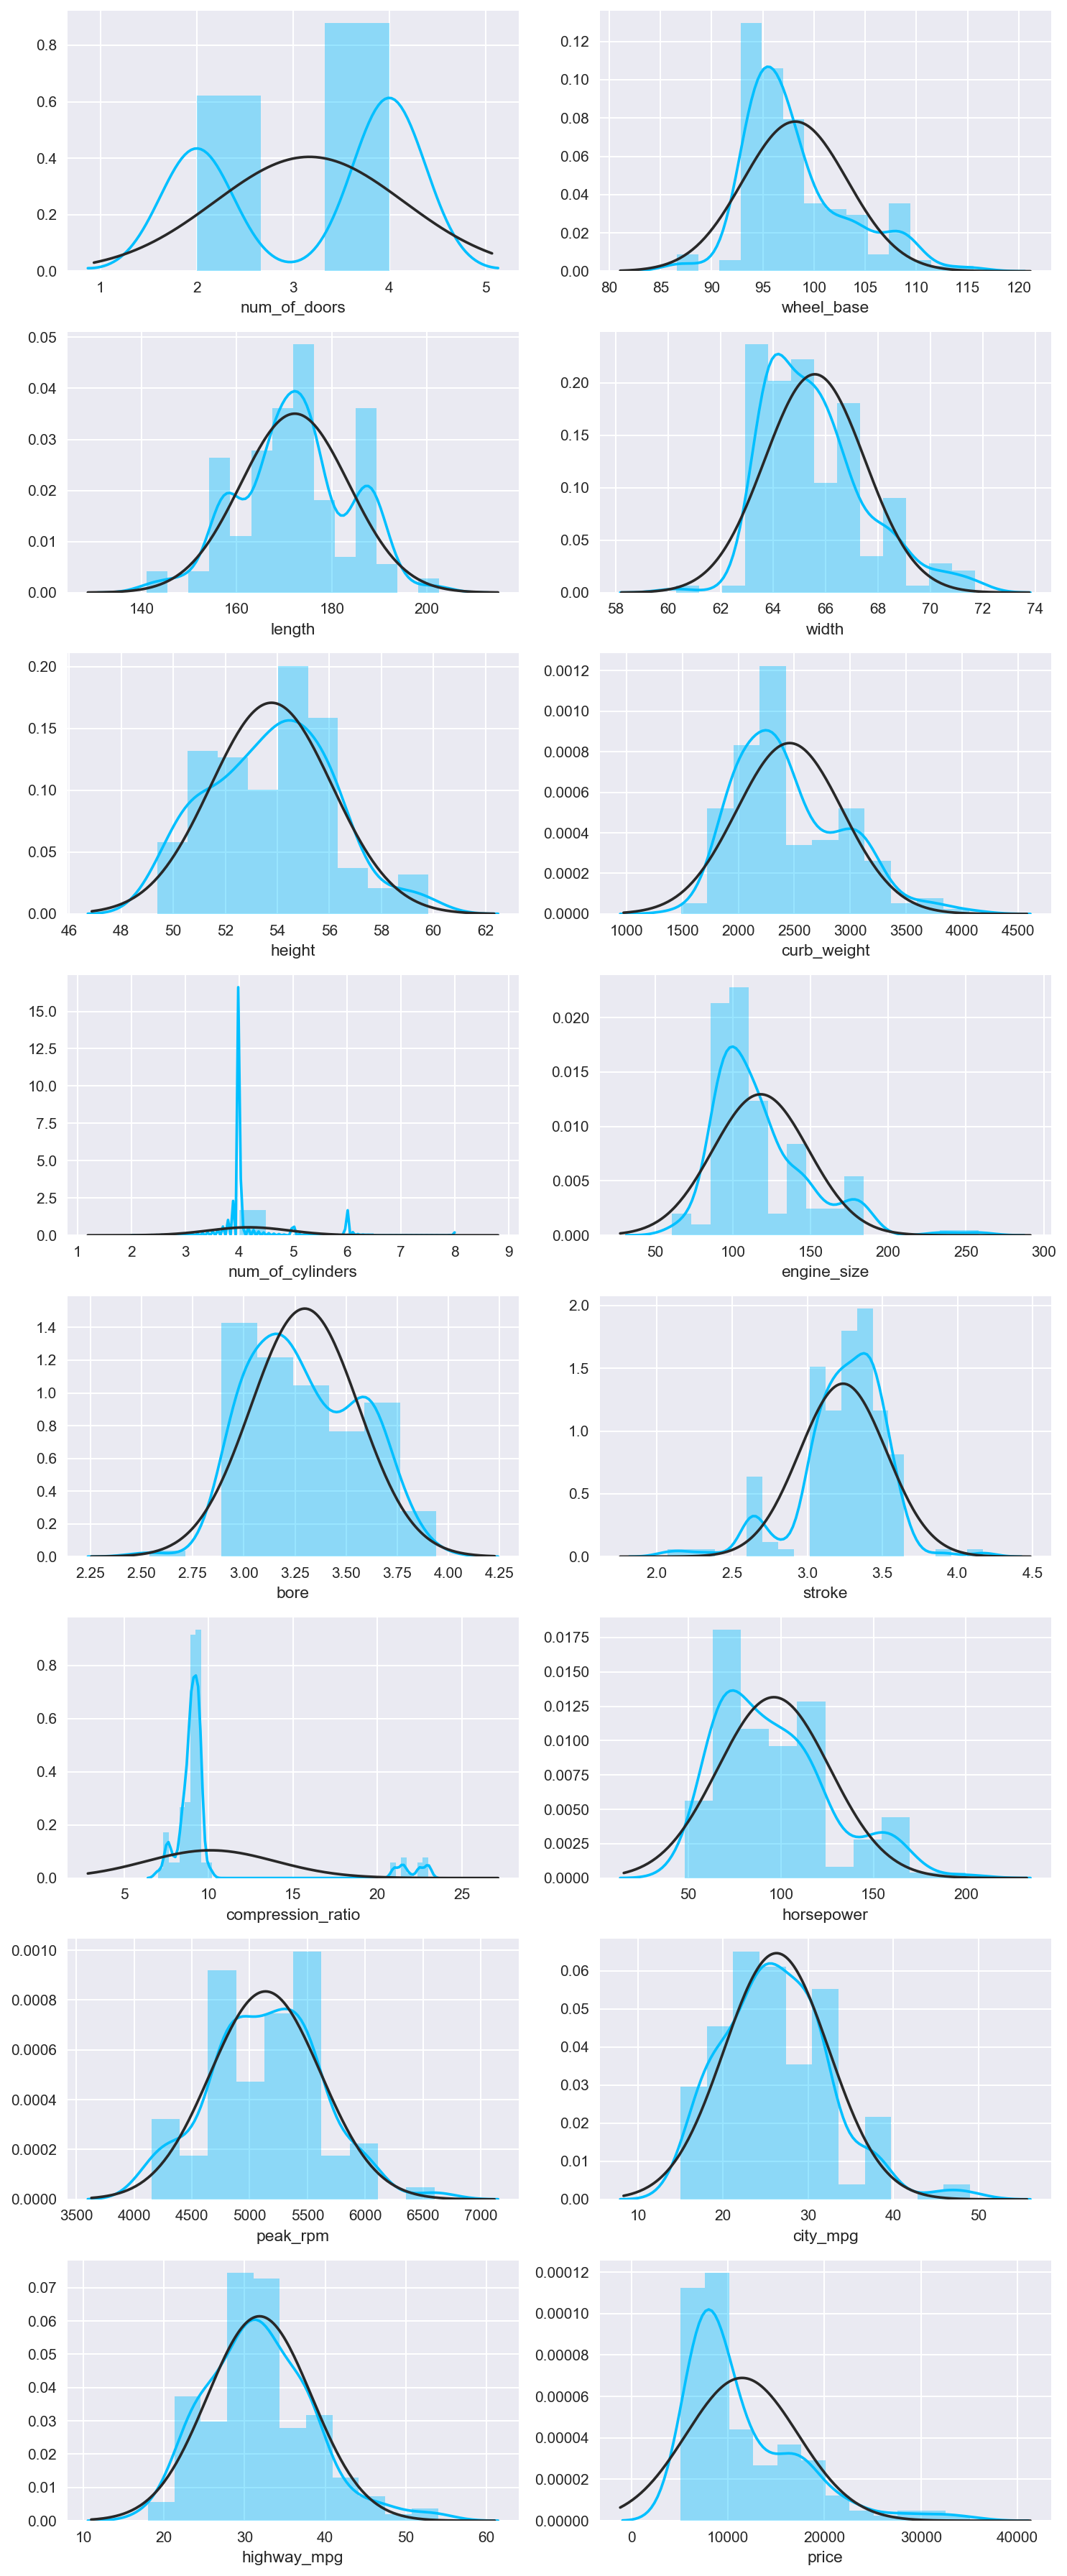

In [40]:
dist_plot(dfX, numeric)
# "wheel_base", "width", "curb_weight", "engine_size", "num-of-cylinders", "horsepower", "price"

In [41]:
# function making correlation matrix 
def corrmatrix(df):
    corrmat = df.corr()
    plt.subplots(figsize=(12, 12), dpi=200)
    sns.heatmap(corrmat, square=True, cmap='coolwarm', annot=True)

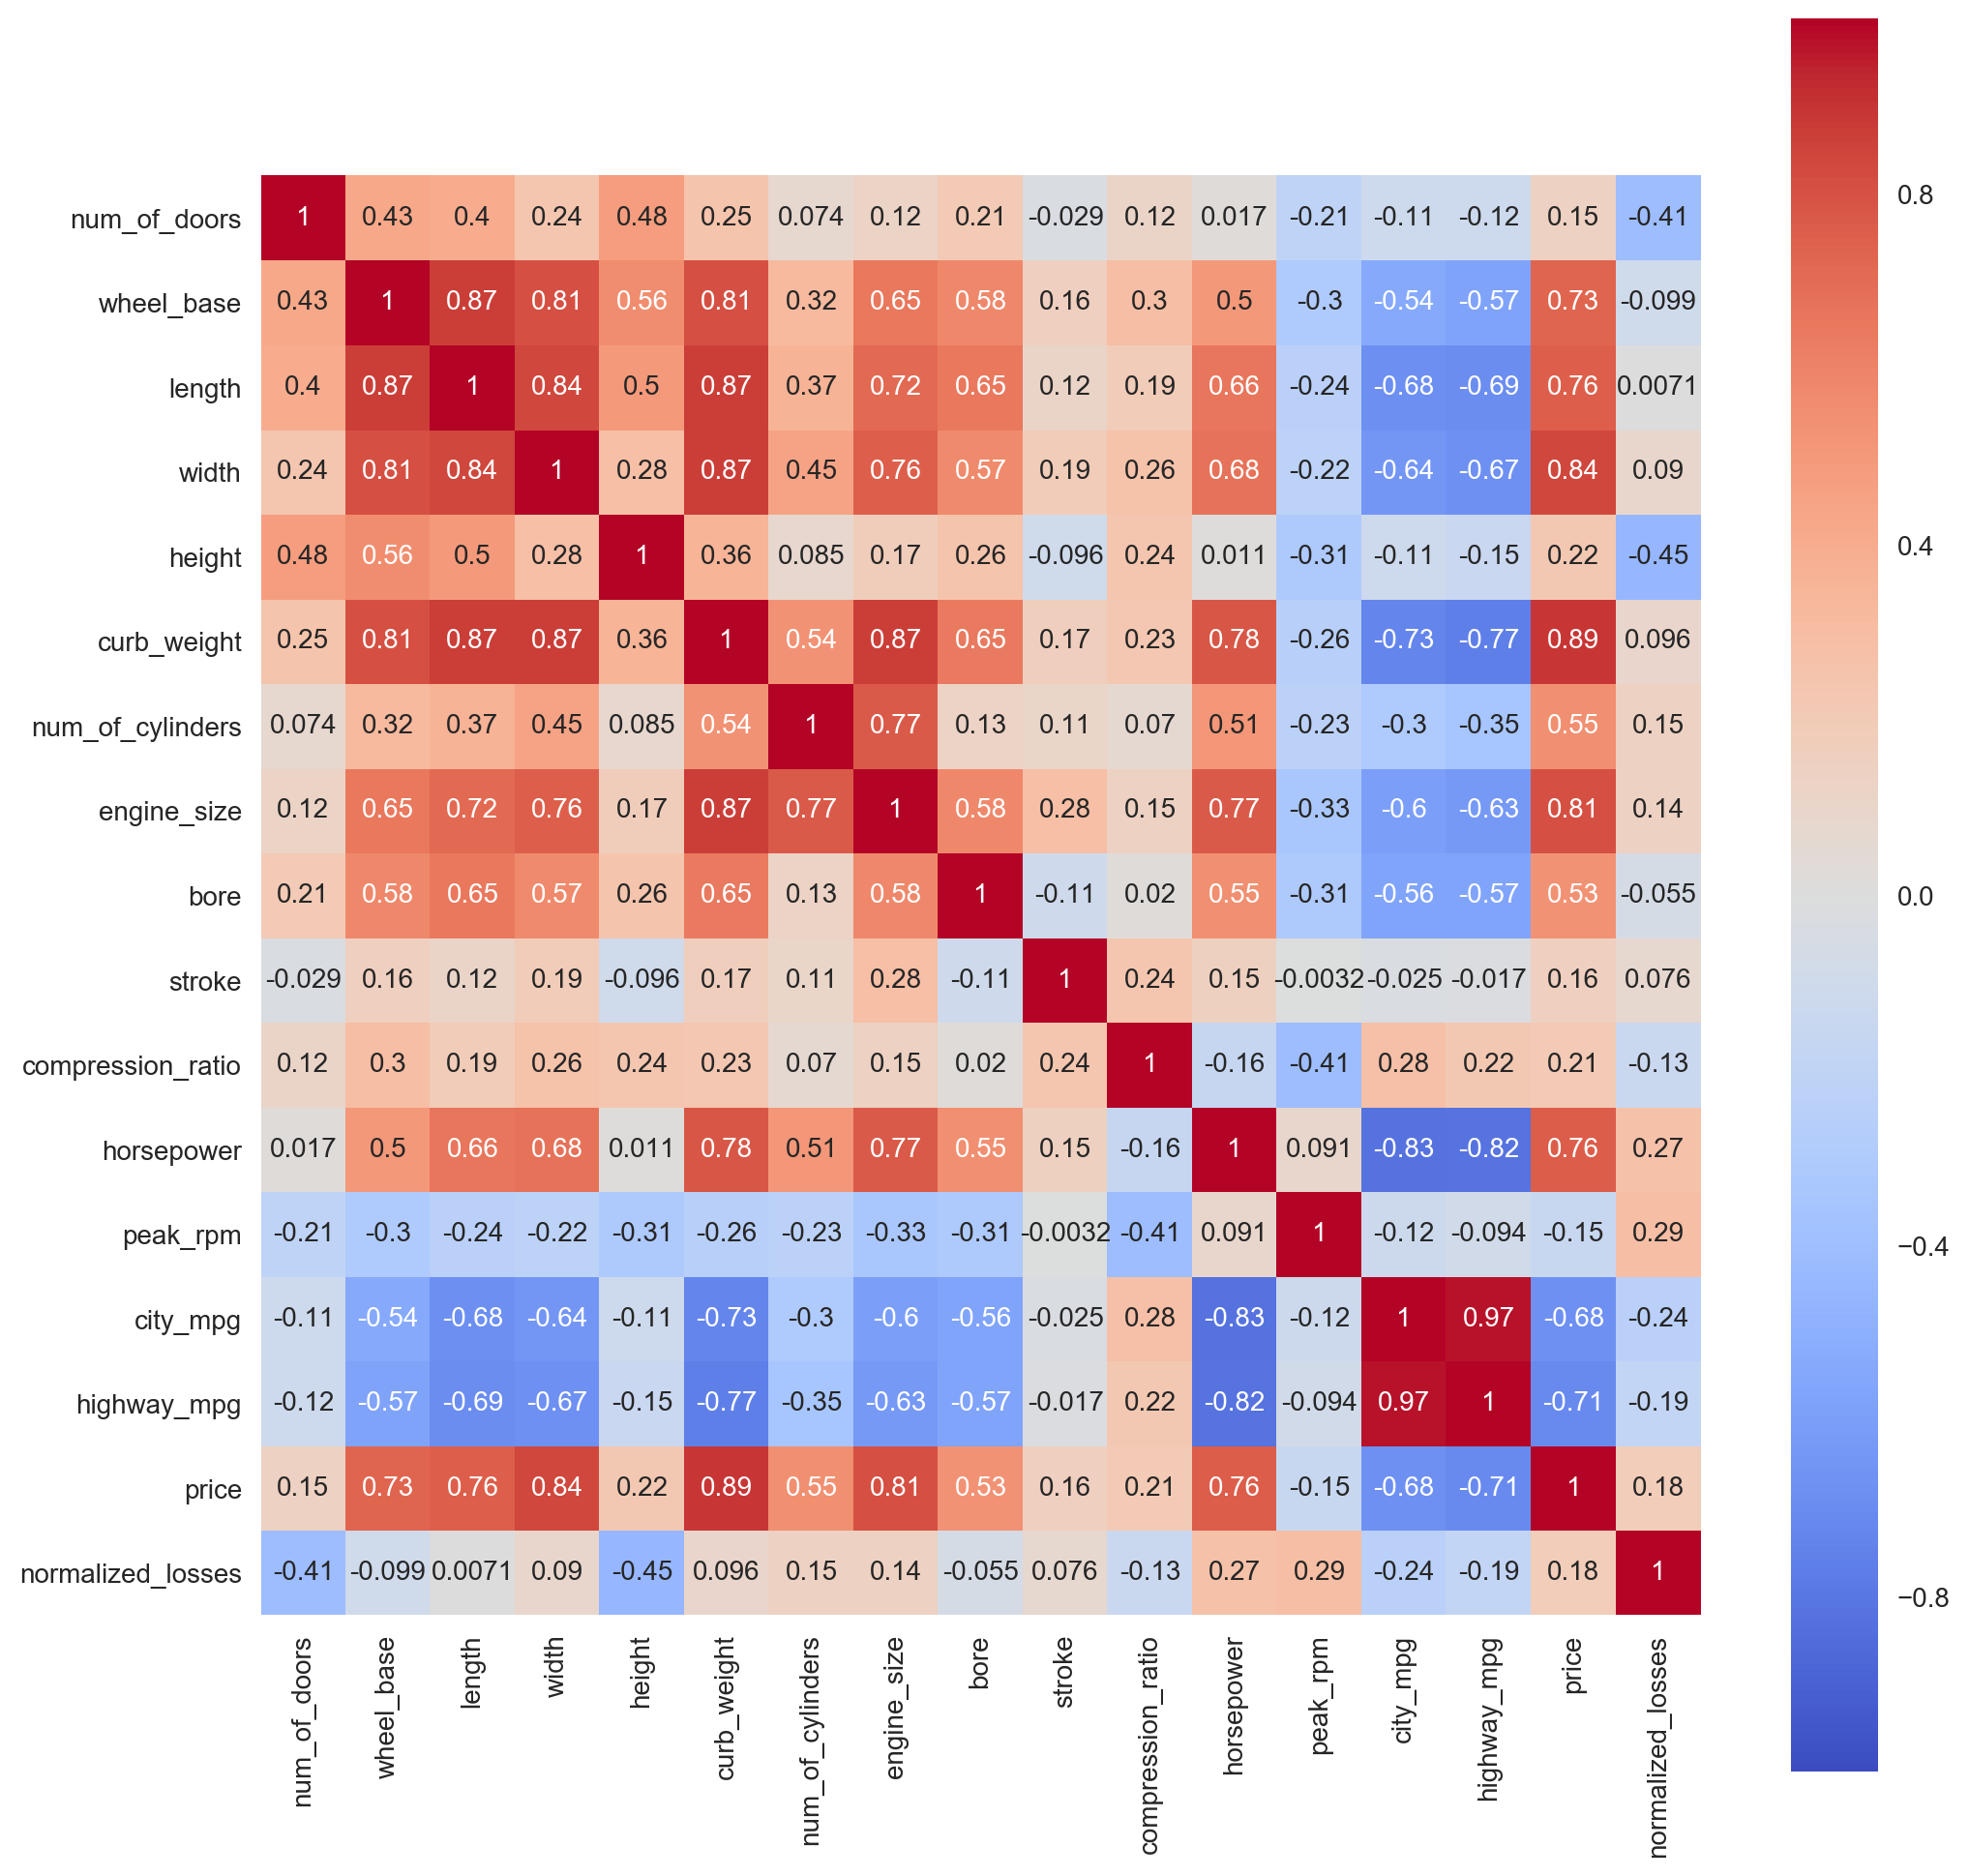

In [42]:
corrmatrix(pd.concat([dfX, dfy], axis=1))

통계적으로 유의미한지 안한지는 확인할 수 없지만 전반적인 부분을 놓고 보았을 때 target feature에 많은 영향을 줄 변수와 multicollinearity 문제 발생을 예상할 수 있다.

In [43]:
# log transformation
dfX[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]] = np.log1p(dfX[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]])

In [44]:
# remove engine_location
dfX = dfX.drop("engine_location", axis=1)

----

## train / test data split

In [49]:
def idx_sort(df):
    df = df.reset_index()
    df = df.iloc[:, 1:]
    return df

dfX = idx_sort(dfX)
dfy = idx_sort(dfy)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,  test_size=0.15, random_state=24)

## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std = std.fit(X_train[numeric])
X_train_std = pd.DataFrame(std.transform(X_train[numeric]), columns=numeric)
X_test_std = pd.DataFrame(std.transform(X_test[numeric]), columns=numeric)

## One hot encoding for categorical variables

In [52]:
# because removing engine_location 
categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels","engine_type", "fuel_system"]

In [53]:
X_train_index = X_train.index.sort_values()
X_test_index = X_test.index.sort_values()

In [54]:
dummy_categorical = pd.get_dummies(dfX[categorical])

In [55]:
X_train_cat = dummy_categorical.iloc[X_train_index, :]
X_test_cat = dummy_categorical.iloc[X_test_index, :]

In [56]:
X_train_cat = idx_sort(X_train_cat)
X_test_cat = idx_sort(X_test_cat)

In [57]:
X_train = pd.concat([X_train_std, X_train_cat], axis=1)
X_test = pd.concat([X_test_std, X_test_cat], axis=1)

In [58]:
X_train.shape

(139, 59)

In [59]:
X_test.shape

(25, 59)

In [60]:
y_train = idx_sort(y_train)
y_test = idx_sort(y_test)

## Linear regression

In [61]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     3.453
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           1.91e-07
Time:                        21:08:15   Log-Likelihood:                 54.428
No. Observations:                 139   AIC:                            -8.856
Df Residuals:                      89   BIC:                             137.9
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

This summary shows there are two major problems I should solve. First, There are many coefficients of features which is not statistically significant. Second, I can comfirm multicollinearity problem on this summary report.



In [62]:
def pred_plot(X, y , model):
    plt.figure(figsize=(10, 4), dpi=150)
    plt.subplot(121)
    plt.scatter(y, model.predict(X), color="lightseagreen", alpha=0.7)
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("actual-predict value")
    
    # residual plot 
    plt.subplot(122)
    plt.scatter(model.predict(X), model.resid, marker="o", c="deepskyblue", alpha=0.7)
    plt.hlines(y=0, xmin=min(model.predict(X)), xmax=max(model.predict(X)), lw=2, color="red", alpha=0.7)
    plt.xlabel("Predicted Value")
    plt.ylabel("Residuals^2")
    plt.title("Predicted - Residual")
    
    plt.tight_layout()
    plt.show()

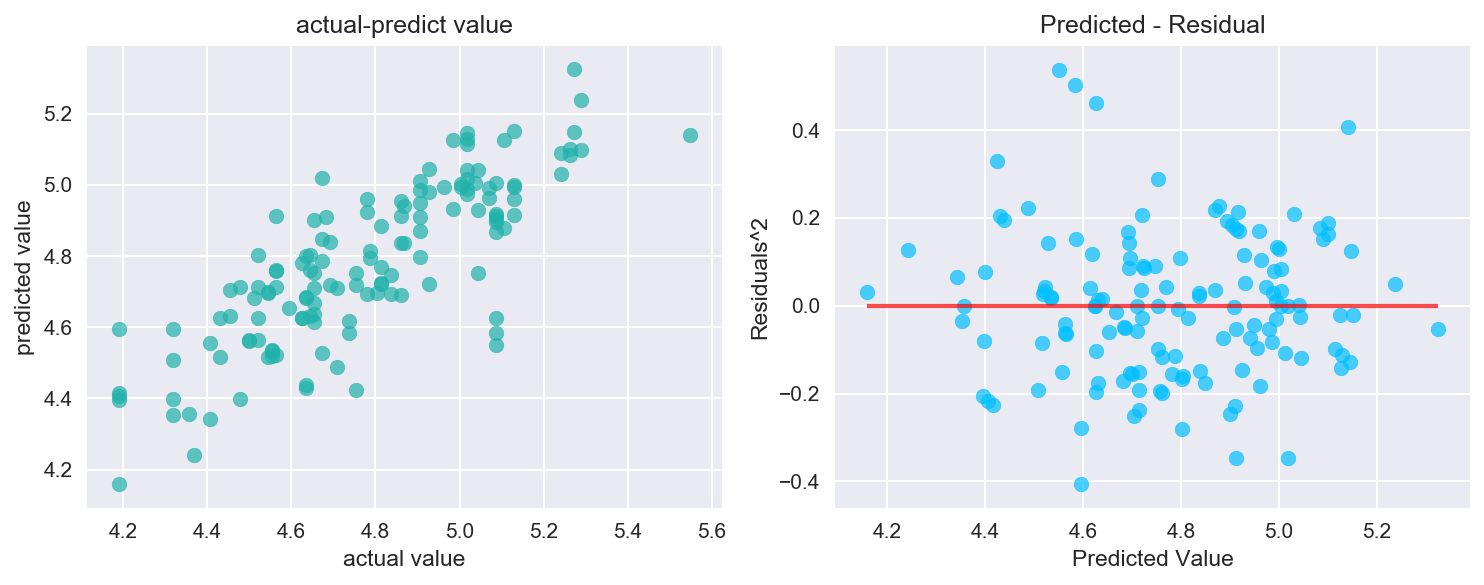

In [63]:
pred_plot(X_train, y_train, model)

## Exploring outliers through leverage and residuals

In [64]:
influence = model.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - model.df_model - 1)
print("Fox's recommendation :", fox_cr)
idx = np.where(cooks_d2 > fox_cr)[0]

Fox's recommendation : 0.0449438202247


/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [65]:
X_outlier = X_train.iloc[idx, :]
y_outlier = y_train.iloc[idx]

In [66]:
print("the numer of outliers : ", len(idx))
print(idx)

the numer of outliers :  8
[  8  27  28  94  95 122 129 136]


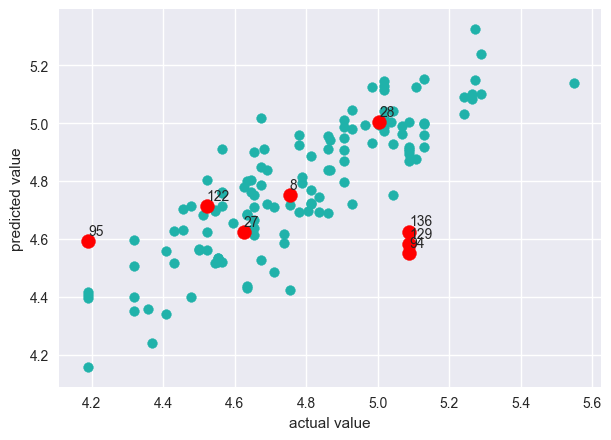

In [67]:
from statsmodels.graphics import utils

plt.figure(figsize=(7, 5), dpi=100)
plt.scatter(y_train, model.predict(X_train), color="lightseagreen")
plt.scatter(y_outlier, model.predict(X_outlier), color="red", s=100)
for i in range(len(idx)):
    plt.annotate(str(idx[i]), xy=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]), 
                 xytext=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]+0.02))
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

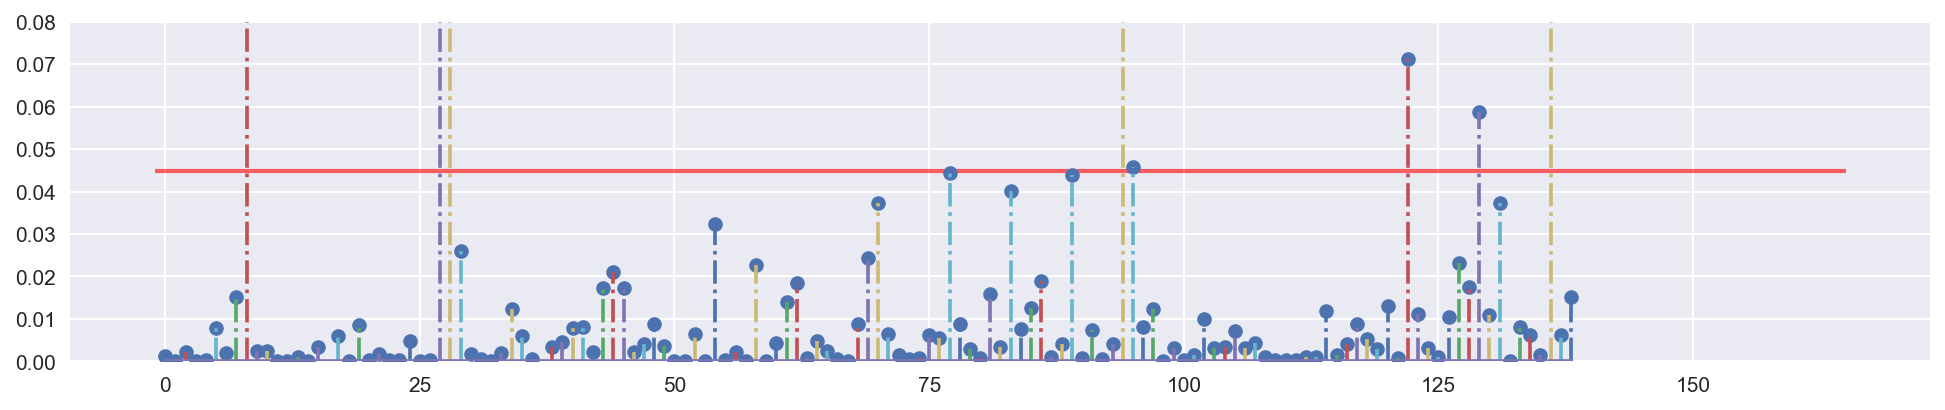

In [68]:
# cooks_d2 
plt.figure(figsize=(16, 3), dpi=150)
plt.stem(cooks_d2, "-.")
plt.ylim([0, 0.08])
plt.hlines(y=fox_cr, xmin=-1, xmax=165, lw=2, color="red",alpha=0.6)
plt.show()

In [69]:
from scipy.stats import zscore

resid = zscore(model.resid)**2
leverage = influence.hat_matrix_diag

out = pd.DataFrame({"index" : idx, "resid" : resid[idx].round(3), "leverage" : leverage[idx].round(3)})
out

,index,leverage,resid
0,8,1.000,0.000
1,27,1.000,0.000
2,28,1.000,0.000
3,94,0.405,10.789
4,95,0.319,6.137
5,122,0.635,1.374
6,129,0.289,9.469
7,136,0.412,7.963


In [70]:
idx = out[out["resid"]!=0]["index"]
idx = np.array(idx)
idx

array([ 94,  95, 122, 129, 136])

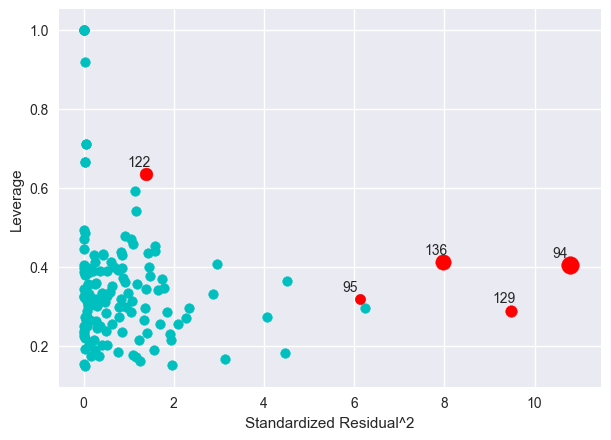

In [71]:
# to see leverange and residuals simultaneously
fig, ax = plt.subplots(figsize=(7,5), dpi=100)

plt.scatter(resid, leverage, color="c")

# for outlier data 
for i in idx:
    plt.scatter(resid[i], leverage[i], color="red", s=cooks_d2[i]*1200)
    plt.annotate(str(i), xy=(resid[i], leverage[i]), xytext=(resid[i]-0.4, leverage[i]+0.02))

plt.xlabel("Standardized Residual^2")
plt.ylabel("Leverage")
plt.show()


In [72]:
y_train = y_train.drop(idx)
y_train = idx_sort(y_train)
X_train = X_train.drop(idx)
X_train = idx_sort(X_train)

## Regression again after removing outliers

In [73]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     5.915
Date:                Thu, 31 Aug 2017   Prob (F-statistic):           6.63e-13
Time:                        21:08:18   Log-Likelihood:                 83.171
No. Observations:                 134   AIC:                            -66.34
Df Residuals:                      84   BIC:                             78.55
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

I did confirm that multicolinearity is occured by dummy variables.  So, I could ignore it 

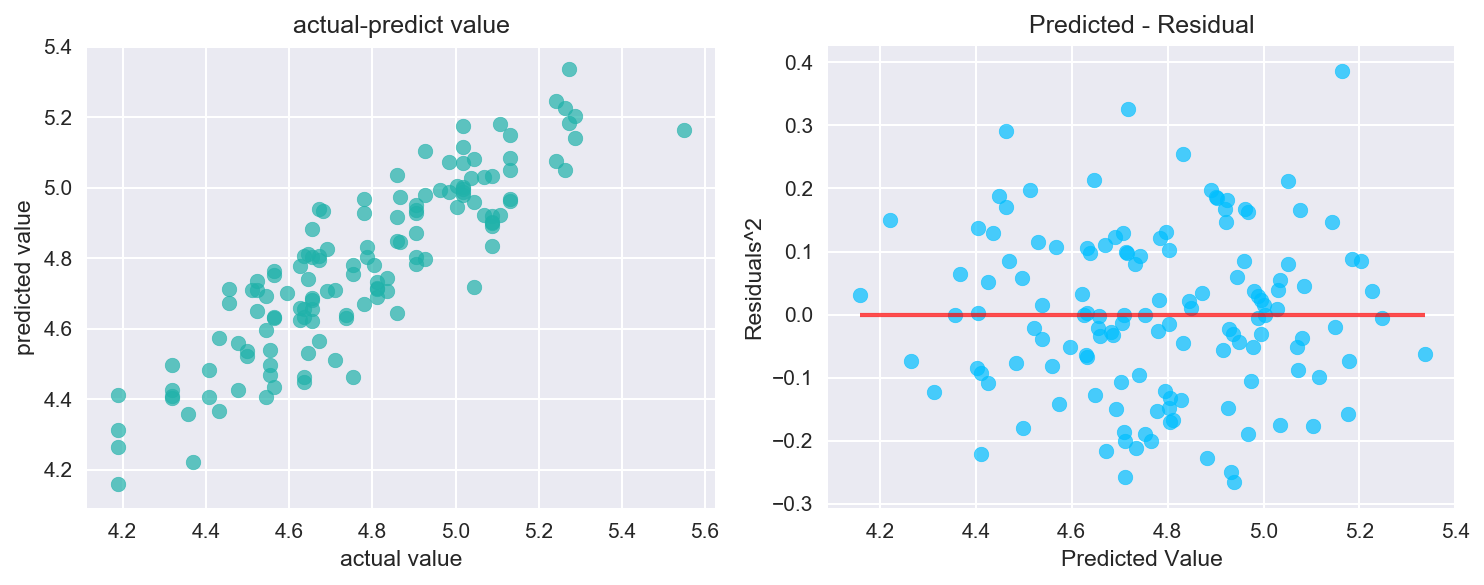

In [74]:
pred_plot(X_train, y_train, model)

There are many the features not statistically significant on this summmury report. 
But, Still, I have problem of multicolinearity. To solve this problem and To avoid overfitting, I tried to use regularized regression like lasso, ridge, elastic net 

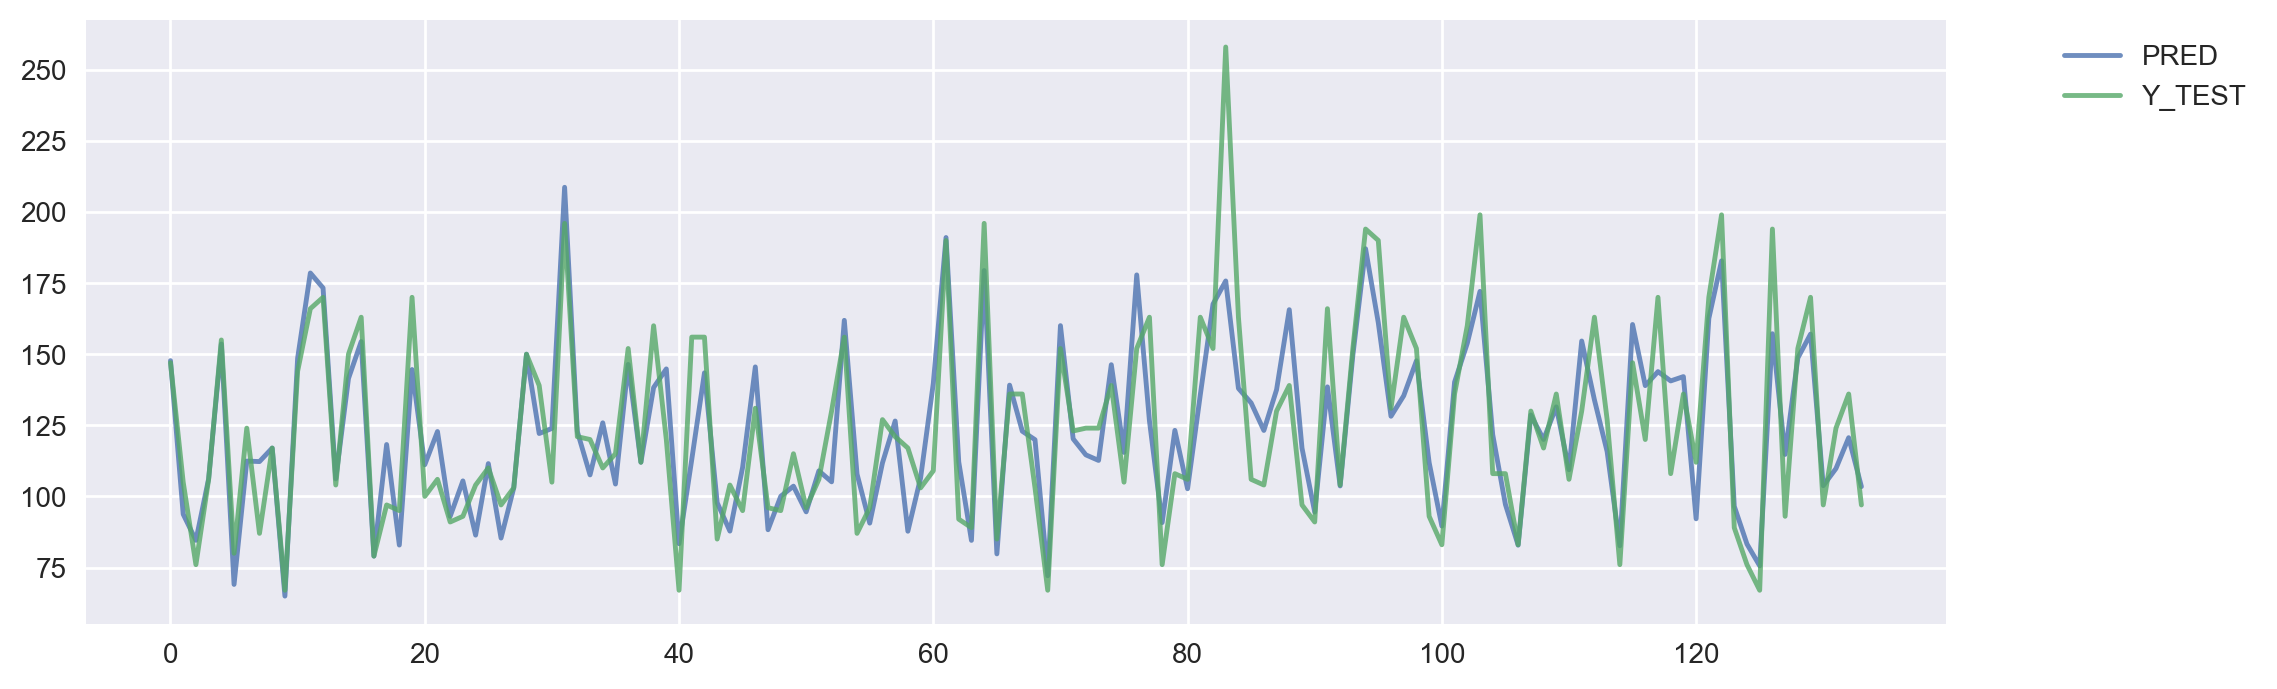

Train_MSE : 0.0169203047118
Train_R2 : 0.775289533079


In [75]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(len(X_train)), np.exp(model.predict(X_train))+1, label="PRED", alpha=0.8)
plt.plot(range(len(X_train)), np.exp(y_train)+1, label="Y_TEST", alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

print("Train_MSE :", mean_squared_error(y_train, model.predict(X_train)))
print("Train_R2 :", r2_score(y_train, model.predict(X_train)))

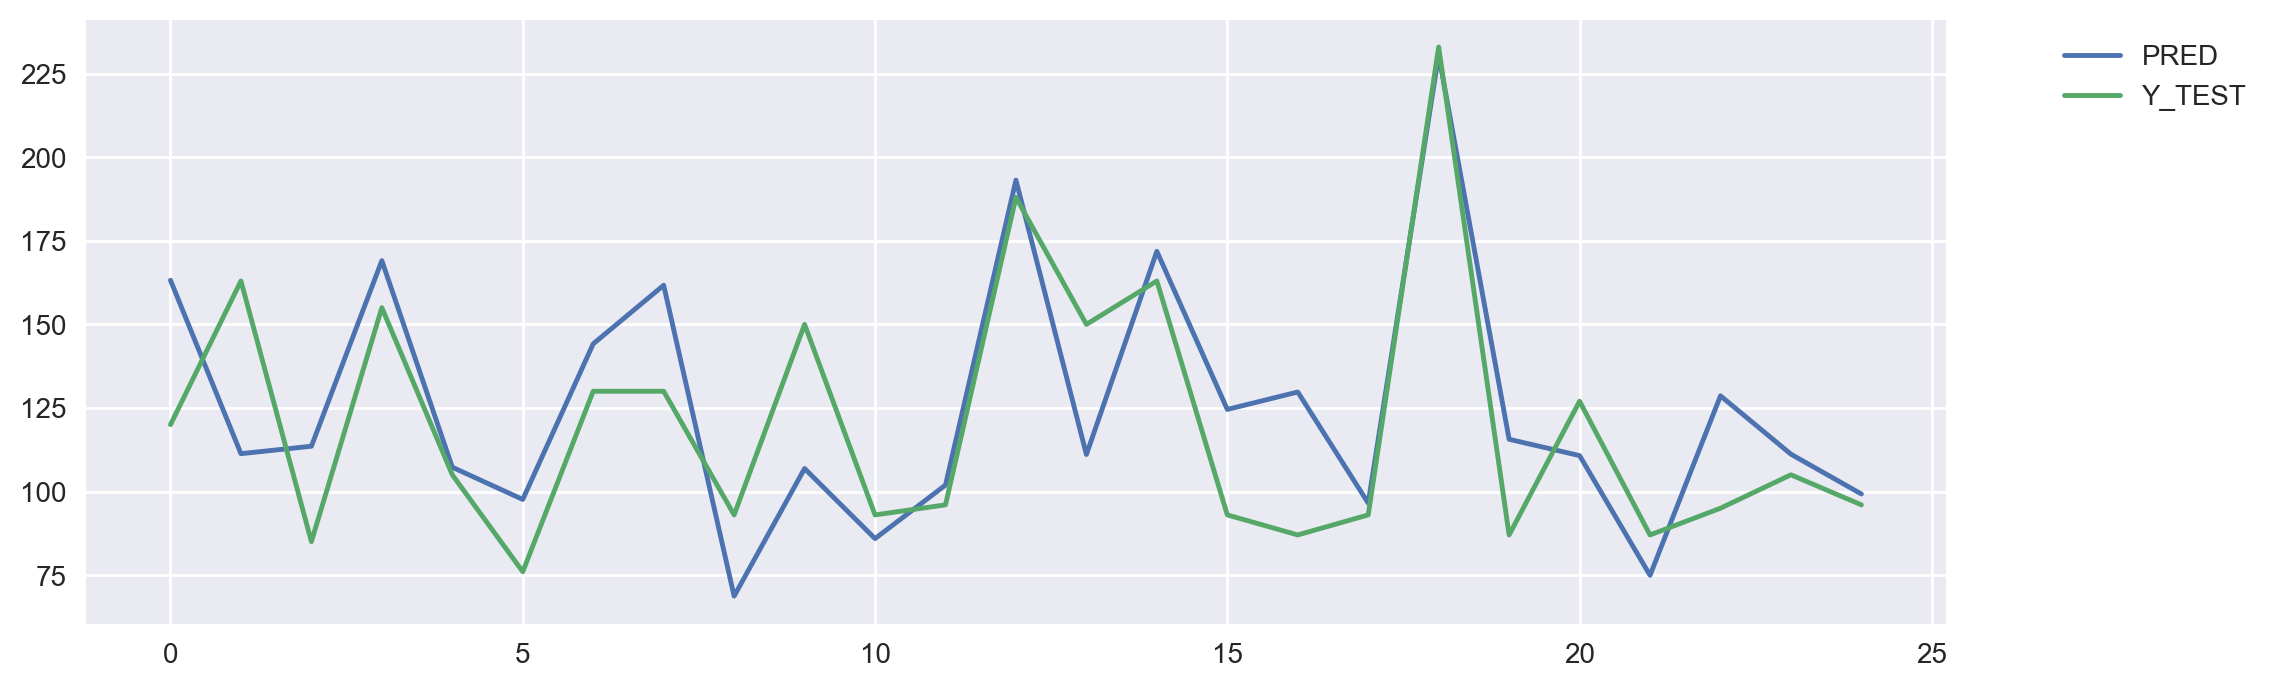

Test_MSE : 0.0500308479405
Test_R2 : 0.399908942999


In [76]:
plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(len(X_test)), np.exp(model.predict(X_test))+1, label="PRED")
plt.plot(range(len(X_test)), np.exp(y_test)+1, label="Y_TEST")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

print("Test_MSE :", mean_squared_error(y_test, model.predict(X_test)))
print("Test_R2 :", r2_score(y_test, model.predict(X_test)))

------

## Try to Regularization model

In [77]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

## Lasso Regression 

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal Alpha :  0.00227584592607


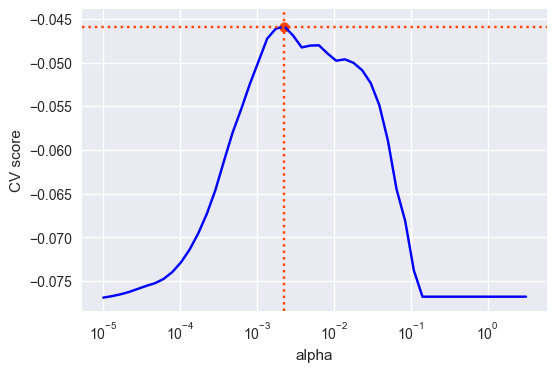

In [78]:
alphas = np.logspace(-5, 0.5, 50)

lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

print("Optimal Alpha : ", lasso_cv.alpha_ )
optimal_lasso = lasso_cv.alpha_ 

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.figure(dpi=100)
plt.semilogx(lasso_cv.alphas_, scores, color="blue")
plt.axhline(np.max(scores), linestyle=':', color="orangered")    
plt.axvline(lasso_cv.alpha_ , linestyle=':',color="orangered")
plt.scatter(lasso_cv.alpha_, np.max(scores), color="orangered")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [79]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV
from sklearn.model_selection import cross_val_score

lasso = LassoCV(alphas = [optimal_lasso]).fit(X_train, y_train)

print("------------ LASSO ------------")
lasso_pred = lasso.predict(X_train)
print("Train_MSE :", mean_squared_error(y_train, lasso_pred))
print("Train_R2 :", r2_score(y_train, lasso_pred))
print("-------------------------------")
lasso_pred2 = lasso.predict(X_test)
print("Test_MSE :", mean_squared_error(y_test, lasso_pred2))
print("Test_R2 :", r2_score(y_test, lasso_pred2))
print("-------------------------------")
print("")

------------ LASSO ------------
Train_MSE : 0.0236481222973
Train_R2 : 0.685940608414
-------------------------------
Test_MSE : 0.0398597171535
Test_R2 : 0.52190576848
-------------------------------



In [82]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

In [83]:
print("Feature Selection")
print("Lasso picked " + str(sum(coef != 0)) + " variables and removed the other " +  str(sum(coef == 0)) + " variables")

Feature Selection
Lasso picked 35 variables and removed the other 24 variables


### feature selection

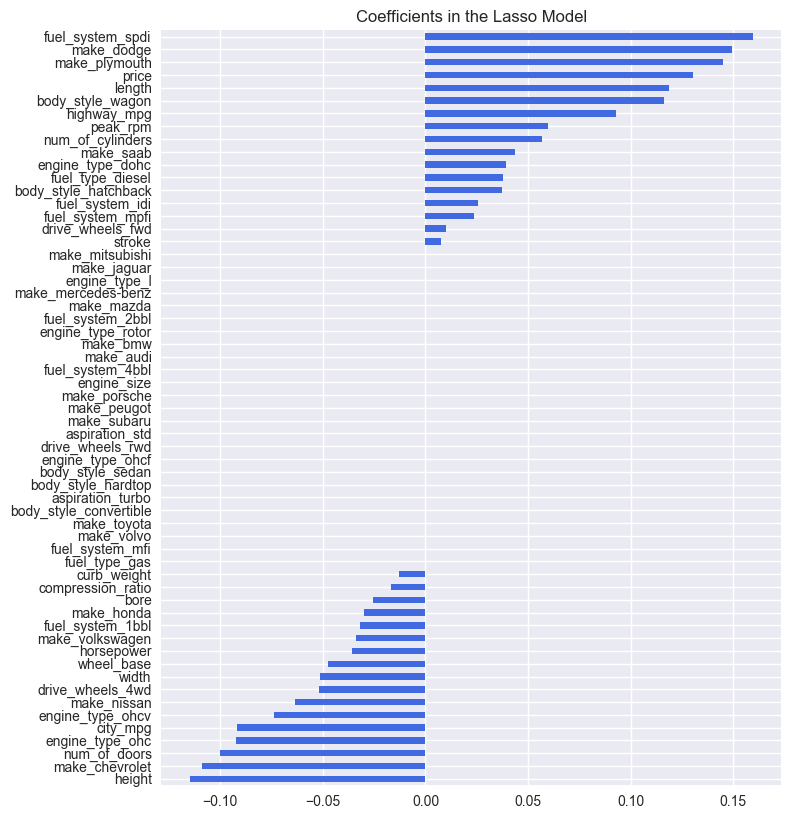

In [84]:
plt.figure(figsize=(8,10), dpi=100)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", color="royalblue")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [80]:
lasso.coef_
print("%-25s" % "Feature", end="")
print("coef")
print("----------------------------------------")
for i in range(len(X_train.columns)):
    print("%-25s" % X_train.columns[i], end="")
    print(lasso.coef_[i].round(3))


Feature                  coef
----------------------------------------
num_of_doors             -0.1
wheel_base               -0.048
length                   0.119
width                    -0.051
height                   -0.115
curb_weight              -0.013
num_of_cylinders         0.057
engine_size              -0.0
bore                     -0.026
stroke                   0.008
compression_ratio        -0.017
horsepower               -0.036
peak_rpm                 0.06
city_mpg                 -0.092
highway_mpg              0.093
price                    0.13
make_audi                -0.0
make_bmw                 -0.0
make_chevrolet           -0.109
make_dodge               0.149
make_honda               -0.03
make_jaguar              0.0
make_mazda               0.0
make_mercedes-benz       0.0
make_mitsubishi          -0.0
make_nissan              -0.064
make_peugot              0.0
make_plymouth            0.145
make_porsche             0.0
make_saab                0.044
make_s

## Ridge Regression

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Optimal Alpha :  6.5512855686


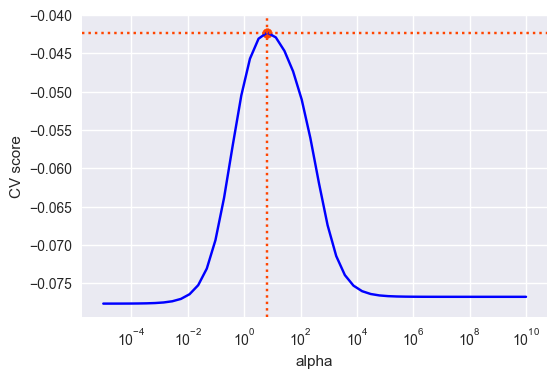

In [85]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score


model = Ridge()
alphas = np.logspace(-5, 10, 50)

scores = list()

for alpha in alphas:
    model.alpha = alpha
    this_scores = cross_val_score(model, X_train, y_train, "neg_mean_squared_error", cv=10)
    scores.append(np.mean(this_scores))

print("Optimal Alpha : ", alphas[np.argmax(scores)])    
optimal_ridge = alphas[np.argmax(scores)]

plt.figure(dpi=100)
plt.semilogx(alphas, scores, color="blue")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':', color="orangered")
plt.axvline(alphas[np.argmax(scores)] , linestyle=':', color="orangered")
plt.scatter(alphas[np.argmax(scores)], np.max(scores), color="orangered")
plt.show()

In [86]:
ridge = Ridge(alpha=optimal_ridge)
ridge.fit(X_train, y_train)

print("------------ RIDGE ------------")
ridge_pred = ridge.predict(X_train)
print("Train_MSE :", mean_squared_error(y_train, ridge_pred))
print("Train_R2 :", r2_score(y_train, ridge_pred))
print("-------------------------------")
ridge_pred2 = ridge.predict(X_test)
print("Test_MSE :", mean_squared_error(y_test, ridge_pred2))
print("Test_R2 :", r2_score(y_test, ridge_pred2))
print("-------------------------------")
print("")

------------ RIDGE ------------
Train_MSE : 0.0252076571944
Train_R2 : 0.665229172014
-------------------------------
Test_MSE : 0.039126034141
Test_R2 : 0.530705871469
-------------------------------



In [88]:
lasso.coef_
print("%-25s" % "Feature", end="")
print("coef")
print("----------------------------------------")
for i in range(len(X_train.columns)):
    print("%-25s" % X_train.columns[i], end="")
    print(ridge.coef_[0][i].round(3))

Feature                  coef
----------------------------------------
num_of_doors             -0.092
wheel_base               -0.045
length                   0.098
width                    -0.045
height                   -0.102
curb_weight              -0.008
num_of_cylinders         0.046
engine_size              0.004
bore                     -0.028
stroke                   0.011
compression_ratio        -0.013
horsepower               -0.025
peak_rpm                 0.057
city_mpg                 -0.068
highway_mpg              0.053
price                    0.107
make_audi                -0.03
make_bmw                 -0.026
make_chevrolet           -0.064
make_dodge               0.084
make_honda               -0.048
make_jaguar              0.021
make_mazda               0.02
make_mercedes-benz       0.006
make_mitsubishi          -0.004
make_nissan              -0.064
make_peugot              0.015
make_plymouth            0.084
make_porsche             0.0
make_saab          

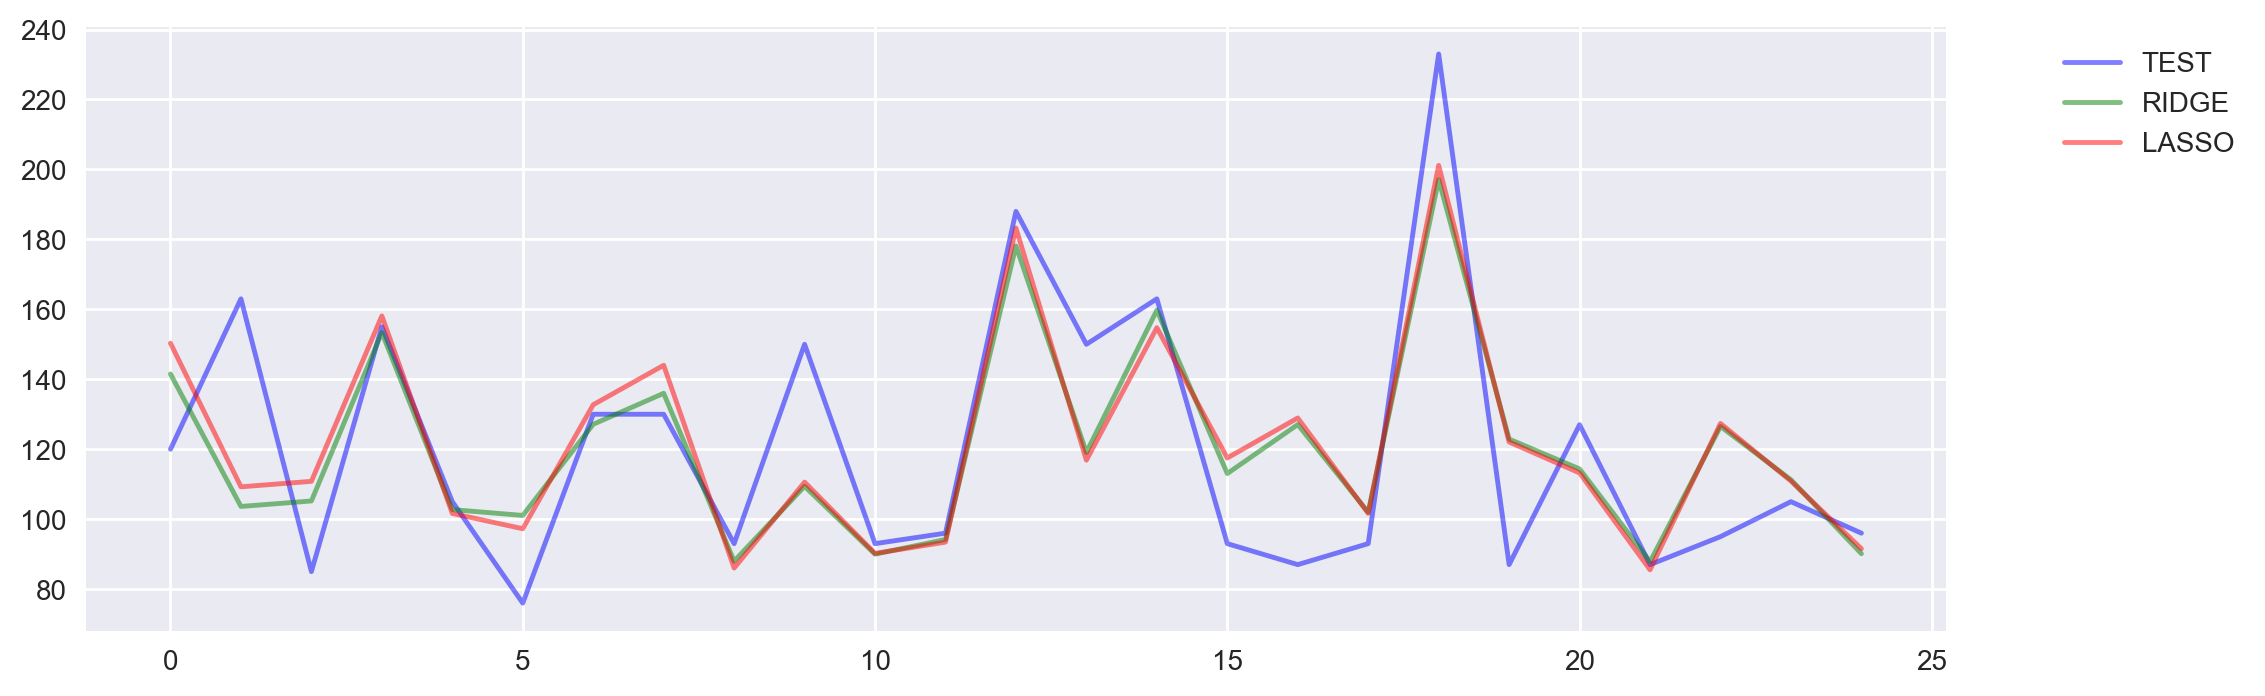

In [89]:
plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(len(y_test)), np.exp(y_test)+1, color="blue", alpha=0.5, label="TEST")
plt.plot(range(len(ridge_pred2)), np.exp(ridge_pred2)+1, color="green", alpha=0.5, label="RIDGE")
plt.plot(range(len(ridge_pred2)), np.exp(lasso_pred2)+1, color="red", alpha=0.5, label="LASSO")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()